## CHEST X-RAY PNEUMONIA

#### Import required libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers

## TRAIN

#### Import class Viral Pneumonia images of training set

In [2]:
train_x=[]

path=r'COVID-19 Radiography Database\Viral Pneumonia\*.png'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Create train_y of size Viral Pneumonia with zeros

In [3]:
a=len(train_x)
train_y=np.zeros(a)

#### Import class COVID-19 images of training set

In [4]:
path=r'COVID-19 Radiography Database\COVID-19\*.png'


for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Concatenate train_y  with ones of size COVID-19

In [5]:
b=len(train_x)
trainy=np.concatenate((train_y,np.ones(b-a)))

#### Import class NORMAL images of training set

In [6]:
path=r'COVID-19 Radiography Database\NORMAL\*.png'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Concatenate train_y with twos of size NORMAL

In [7]:
c=len(train_x)
trainyy=np.concatenate((trainy,np.full(c-b, 2.)))

In [8]:
trainx = np.stack(train_x) # Converts the list of arrays to a array of arrays

In [9]:
tx,vx,ty,vy=train_test_split(trainx,trainyy)

In [10]:
ty = tf.keras.utils.to_categorical(ty)
vy = tf.keras.utils.to_categorical(vy)

#### Train Model

In [11]:
tf.random.set_seed(1234)
es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5) # to prevent overfitting

model=tf.keras.Sequential(
[
    layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu', padding='same'),    
    layers.MaxPooling2D(pool_size=(4, 4)),
    layers.Dropout(0.25),
            
    layers.Conv2D(40, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(8, 8)),
    layers.Dropout(0.2),  
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(3,activation='softmax')
    
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
mod=model.fit(tx,ty,validation_data=(vx,vy),batch_size=300,epochs=40,callbacks=[es])

Epoch 1/40
8/8 [==============================] - 7s 916ms/step - loss: 21.4919 - accuracy: 0.4454 - val_loss: 2.5858 - val_accuracy: 0.4801
Epoch 2/40
8/8 [==============================] - 8s 945ms/step - loss: 5.0144 - accuracy: 0.4826 - val_loss: 0.8790 - val_accuracy: 0.5227
Epoch 3/40
8/8 [==============================] - 8s 963ms/step - loss: 1.7055 - accuracy: 0.4343 - val_loss: 0.9081 - val_accuracy: 0.6259
Epoch 4/40
8/8 [==============================] - 8s 1s/step - loss: 1.0351 - accuracy: 0.5220 - val_loss: 0.9599 - val_accuracy: 0.5543
Epoch 5/40
8/8 [==============================] - 8s 1s/step - loss: 0.8888 - accuracy: 0.5680 - val_loss: 0.9473 - val_accuracy: 0.5557
Epoch 6/40
8/8 [==============================] - 8s 999ms/step - loss: 0.8387 - accuracy: 0.6006 - val_loss: 0.9000 - val_accuracy: 0.6795
Epoch 7/40
8/8 [==============================] - 9s 1s/step - loss: 0.7691 - accuracy: 0.6400 - val_loss: 0.8707 - val_accuracy: 0.6960
Epoch 8/40
8/8 [============

#### Visualize

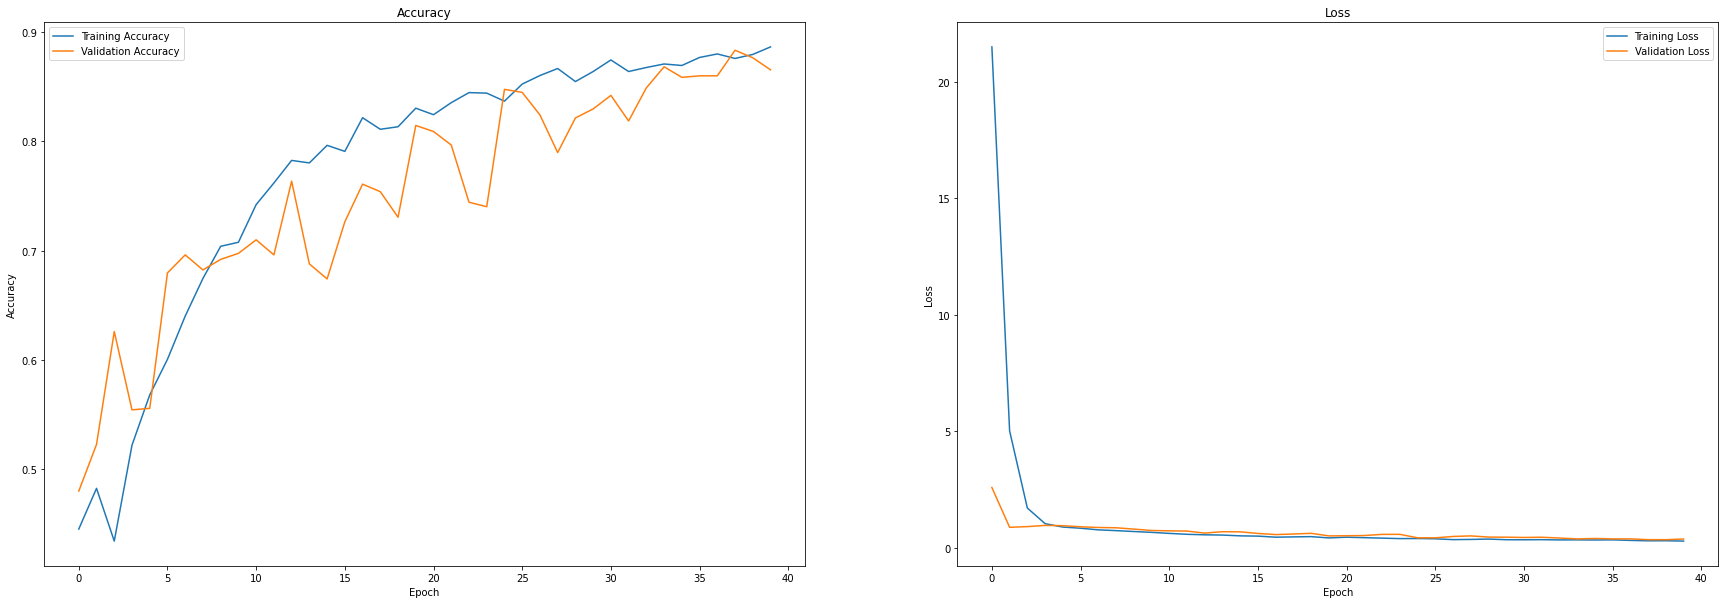

In [12]:
fig=plt.subplots(figsize=(30,10))

plt.subplot(1,2,1)
plt.plot(mod.history['accuracy'])
plt.plot(mod.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])

plt.subplot(1,2,2)
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])

plt.show()